In [1]:
from utils import *

In [2]:
# Matplotlib parameters

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16


<br>
<br>
<br>
<center>
<font size='6' style="color:#4CAF50"><b>Data Acquisition</b></font>
<hr style= "height:2px;">
</center>
<br>
<br>

In [3]:
# Call MongoDB

client = MongoClient()


In [4]:
# Call the specific documents

db = client['Companies']


In [5]:
# Define the query

query_bd = {'number_of_employees':{'$gt':99}, 'founded_year':{'$lt':2011}, 'deadpooled_year': {'$eq': None}}


In [6]:
#Convert the query result to a list

my_companies = list(db.Companies.find(query_bd, {'name':1, 'category_code':1, 'number_of_employees':1, 'founded_year':1, 'tag_list':1, 'description':1, 'overview':1, 'total_money_raised':1, 'offices':1, 'ipo':1 }))


In [7]:
# Create a DataFrame from the query list

df_raw_companies = pd.DataFrame(my_companies)


In [8]:

df_raw_companies.head(3)


,_id,category_code,description,founded_year,ipo,name,number_of_employees,offices,overview,tag_list,total_money_raised
0,52cdef7c4bab8bd675297d8e,social,Social network,2004,"{'valuation_amount': 104000000000, 'valuation_...",Facebook,5299,"[{'description': 'Headquarters', 'address1': '...",<p>Facebook is the world&#8217;s largest socia...,"facebook, college, students, profiles, network...",$2.43B
1,52cdef7c4bab8bd675297d94,social,Real time communication platform,2006,"{'valuation_amount': 18100000000, 'valuation_c...",Twitter,1300,"[{'description': '', 'address1': '1355 Market ...","<p>Created in 2006, Twitter is a global real-t...","text, messaging, social, community, twitter, t...",$1.16B
2,52cdef7c4bab8bd675297d9b,web,Online Marketplace,1995,"{'valuation_amount': None, 'valuation_currency...",eBay,15000,"[{'description': 'Headquarters', 'address1': '...","<p>Founded in 1995 in San Jose, CA, eBay conne...","auction, bid, search, market",$6.7M


In [9]:
# Create a dataframe to make a metric-analysis
# Here we add the cities with the most companies

metric_df = pd.DataFrame.from_dict(top_cities(df_raw_companies), orient='index', columns=['local_comp'])


In [10]:
# Here we analysi the connectivity of each city

metric_df['dist_param'] = pd.DataFrame.from_dict(get_dist_param(df_raw_companies), orient='index').set_index(metric_df.index)


In [11]:
# Here we analyze the cost of living for each city

metric_df['cost_param'] = pd.DataFrame([cost_cities[i.split(',')[0]] for i in metric_df.index]).set_index(metric_df.index)


<br>
<br>
<br>
<center>
<font size='6' style="color:#00A6D6"><b>Application of the Metric</b></font>
<hr style= "height:2px;">
</center>
<br>
<br>

In [12]:
# The following code applies the metric to the dataframe and returns the final score

scores = pd.DataFrame(metric_df.apply(metric_score, axis=1))


In [13]:
# Add the scores columns

metric_df['score'] = scores


In [23]:
metric_df.apply(metric_score, axis=1)

New York, USA          7.987872
San Francisco, USA    11.195347
London, GBR            4.018391
Chicago, USA           0.201205
San Jose, USA          7.605419
Paris, FRA             0.000031
Tokyo, JPN             2.018585
Seattle, USA           0.000022
Beijing, CHN           0.000102
Austin, USA            0.000051
San Mateo, USA         0.214499
Los Angeles, USA      14.443960
Shanghai, CHN          0.000048
Singapore, SGP         0.000005
Mountain View, USA     3.355493
Cambridge, USA         0.836807
Palo Alto, USA         1.319316
San Diego, USA         0.102755
Santa Clara, USA       4.374977
Sunnyvale, USA         3.249886
Bangalore, IND         0.020318
Madrid, ESP            0.000077
Berlin, DEU            0.048062
Chennai, IND           0.124367
Fremont, USA           0.370841
Boston, USA            0.129722
Santa Monica, USA      2.717978
Toronto, CAN           0.516925
Irvine, USA            0.000010
Atlanta, USA           0.900879
Amsterdam, NLD         1.480752
Scottsda

In [14]:
# Top cities by number of companies

top_comp = metric_df.sort_values('local_comp', ascending=False)[:10]


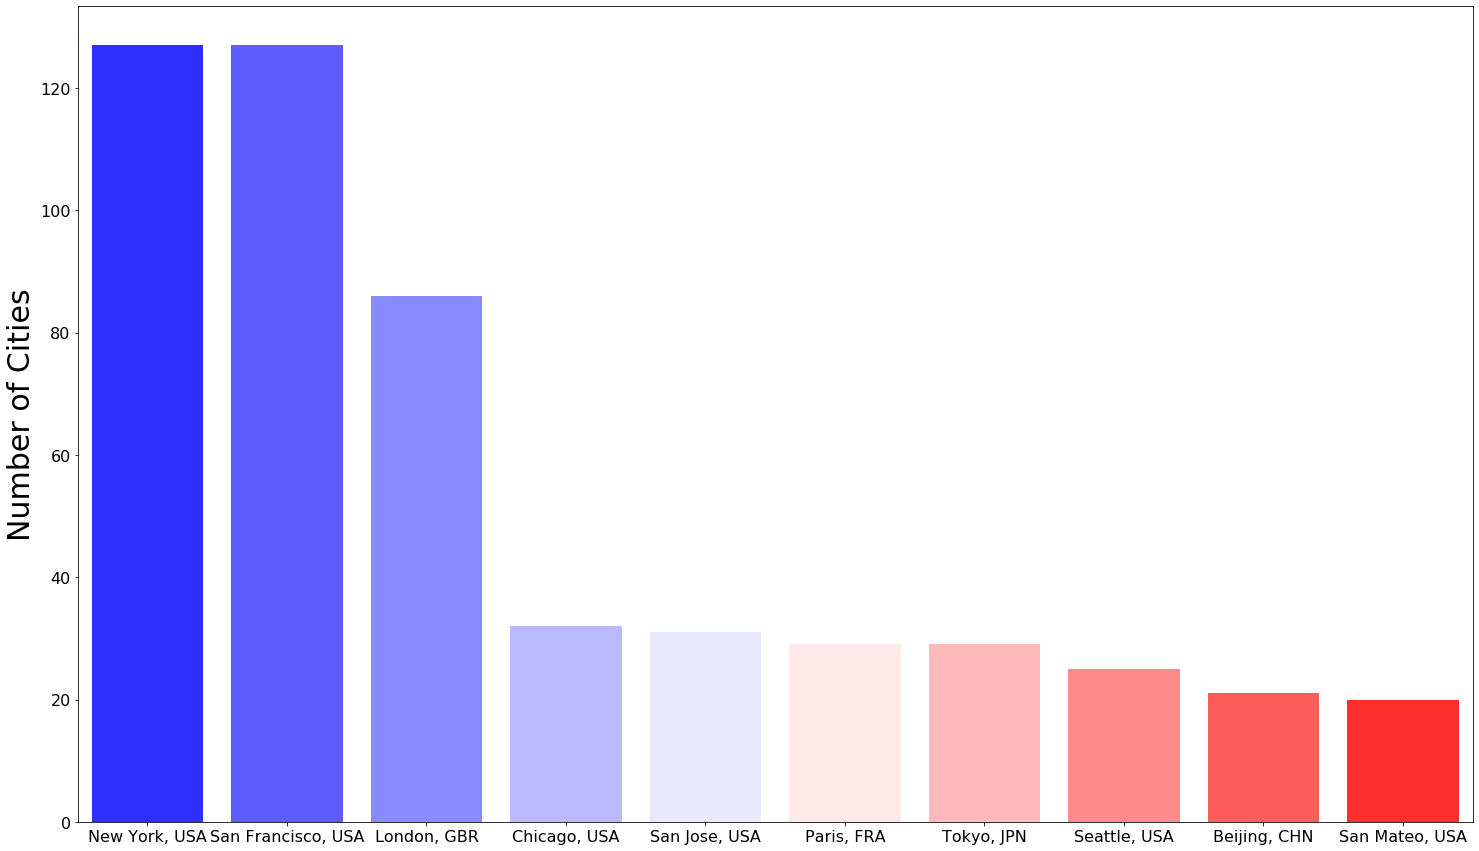

In [15]:
# Plot the TOP 10 cities by number of companies

plt.figure(figsize=(25,15))
sns.barplot(x = top_comp.index , y='local_comp', data = top_comp, palette='bwr', saturation=3)
plt.ylabel('Number of Cities', fontsize=30)

plt.show()

<br>
<br>
<br>

In [16]:
# TOP 10 Connectected cities

top_con = metric_df.sort_values('dist_param', ascending=False)[:10]


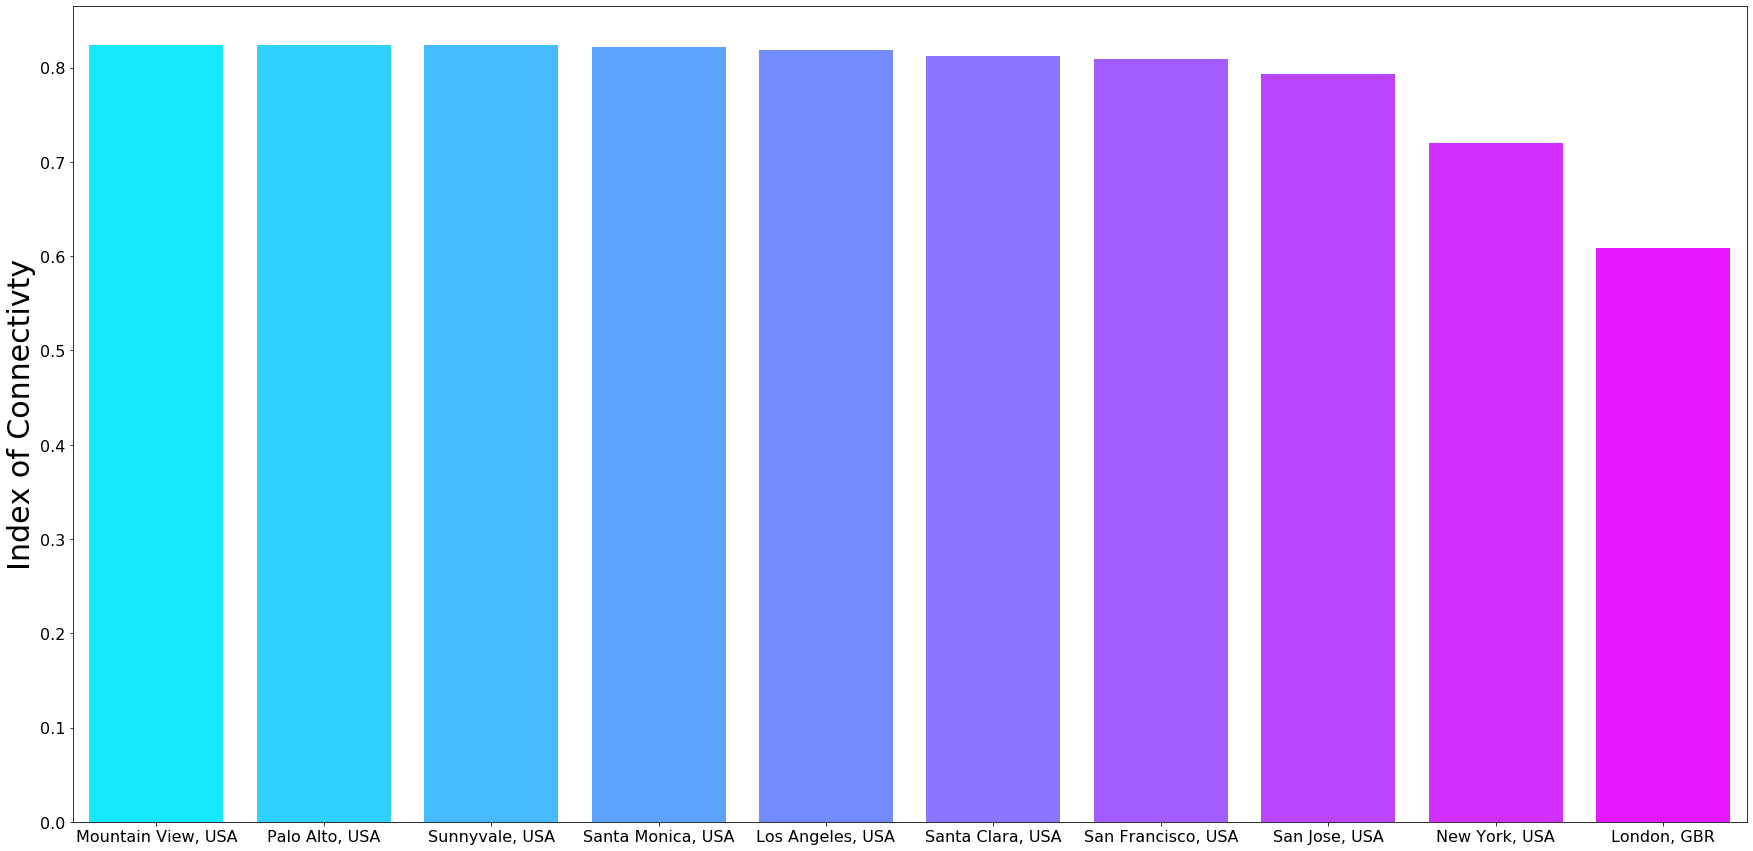

In [17]:
# Plot TOP 10 companies by connectivity

plt.figure(figsize=(30,15))
sns.barplot(x = top_con.index , y='dist_param', data = top_con, palette='cool', saturation=3)
plt.ylabel('Index of Connectivty', fontsize=30)
plt.show()


<br>
<br>
<br>

In [18]:
# TOP Companies by cost of living

top_cost = metric_df.sort_values('cost_param', ascending=True)[:10]


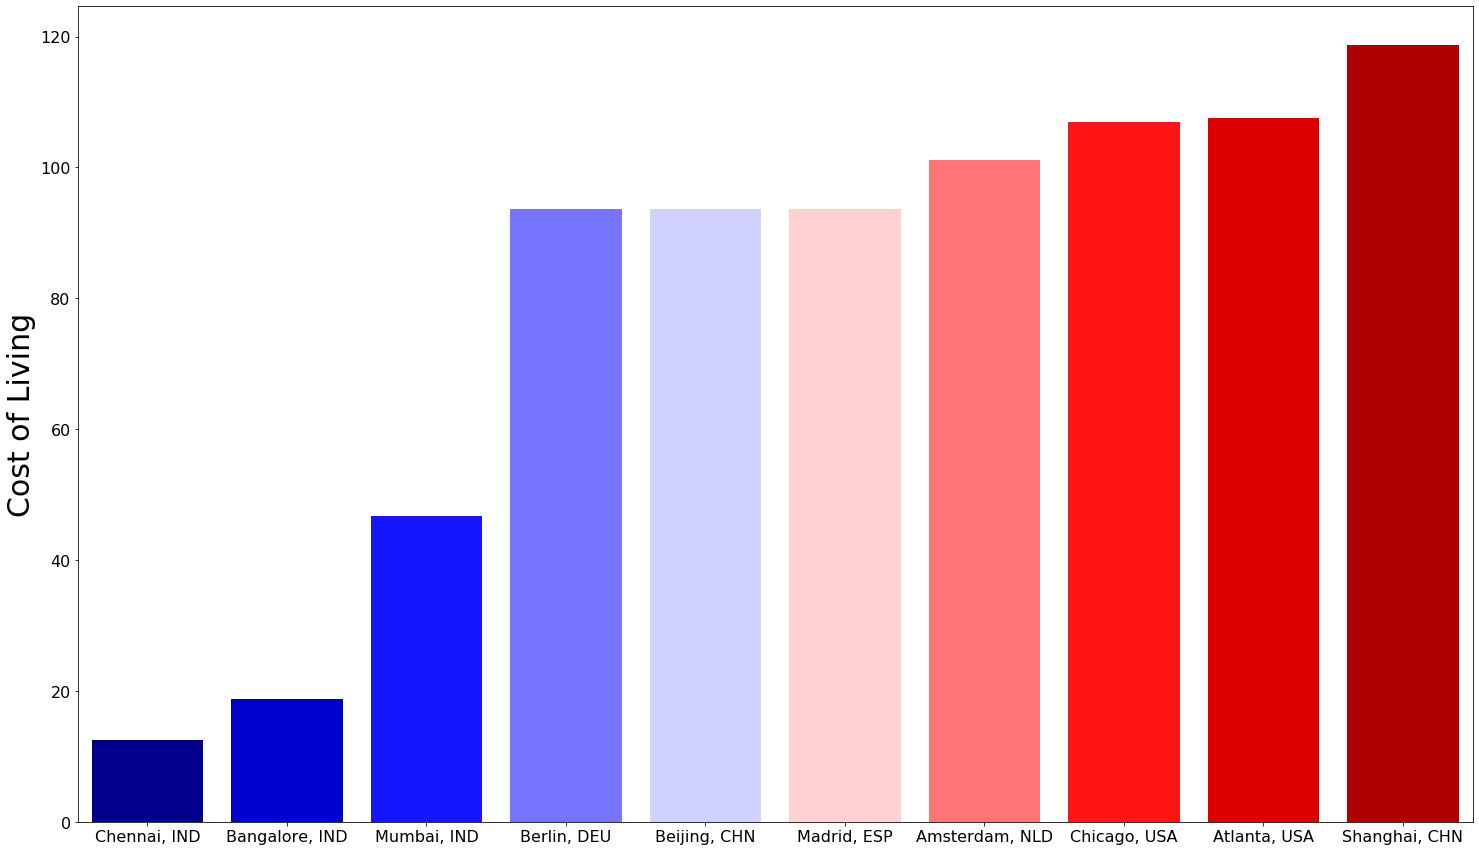

In [19]:
plt.figure(figsize=(25,15))
sns.barplot(x = top_cost.index , y='cost_param', data= top_cost, palette='seismic', saturation=3)
plt.ylabel('Cost of Living', fontsize=30)
plt.show()

<br>
<br>
<br>

In [20]:
# Top 10 Metric Scores

top_scores = metric_df.sort_values('score', ascending=False)[:10]


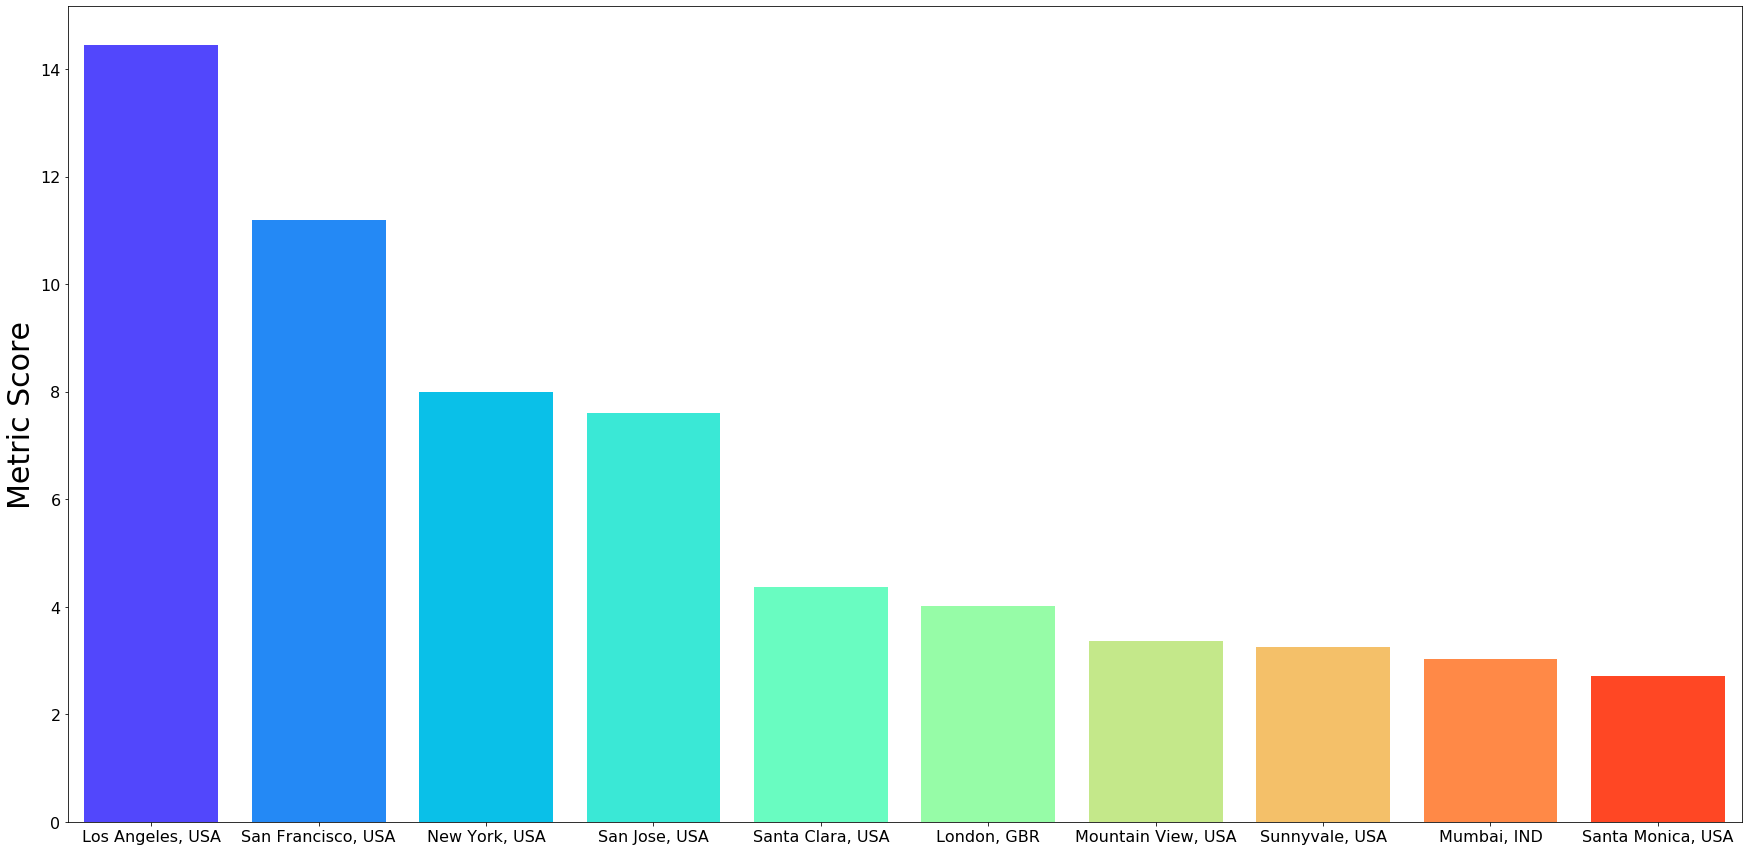

In [21]:
# Plot the TOP 10 Cities by their Metric Score

plt.figure(figsize=(30,15))
sns.barplot(x = top_scores.index , y='score', data= top_scores, palette='rainbow', saturation=3)
plt.ylabel('Metric Score', fontsize=30)
plt.show()


In [22]:
metric_df

,local_comp,dist_param,cost_param,score
"New York, USA",127,0.720206,187.2000,7.987872
"San Francisco, USA",127,0.809472,269.3000,11.195347
"London, GBR",86,0.608738,140.4000,4.018391
"Chicago, USA",32,0.360587,106.9000,0.201205
"San Jose, USA",31,0.793672,214.5000,7.605419
"Paris, FRA",29,0.100000,156.0000,0.000031
"Tokyo, JPN",29,0.568953,124.8000,2.018585
"Seattle, USA",25,0.100000,172.3000,0.000022
"Beijing, CHN",21,0.100000,93.6000,0.000102
"Austin, USA",20,0.100000,119.3000,0.000051
